# PROJECT -- FOOD OUTLETS SALES PREDICTION USING MACHINE LEARNING

# PART 1 -- DATA PROCESSING AND EXPLORATORY DATA ANALYSIS

# Importing the Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
df = pd.read_csv('Sales_Dataset.csv')
df.head()

,Unnamed: 0,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Sales
0,0,FDA15,3.1,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3824.0
1,1,DRC01,0.6,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,293.0
2,2,FDN15,2.1,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,1590.0
3,3,FDX07,0.9,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,2126.0
4,4,NCD19,1.2,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,509.0


In [3]:
# The dataset has 14,204 rows and 12 columns (Exluding the Unnamed column)
df.shape

(14204, 13)

In [4]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 14204 non-null  int64  
 1   Item_Identifier            14204 non-null  object 
 2   Item_Weight                13228 non-null  float64
 3   Item_Fat_Content           14204 non-null  object 
 4   Item_Visibility            14204 non-null  float64
 5   Item_Type                  14204 non-null  object 
 6   Item_MRP                   13404 non-null  float64
 7   Outlet_Identifier          14204 non-null  object 
 8   Outlet_Establishment_Year  14204 non-null  int64  
 9   Outlet_Size                10188 non-null  object 
 10  Outlet_Location_Type       14204 non-null  object 
 11  Outlet_Type                14204 non-null  object 
 12  Outlet_Sales               14204 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usag

# Data Processing

In [5]:
# Dropping the non required feature.
df.drop('Unnamed: 0',axis=1,inplace=True)

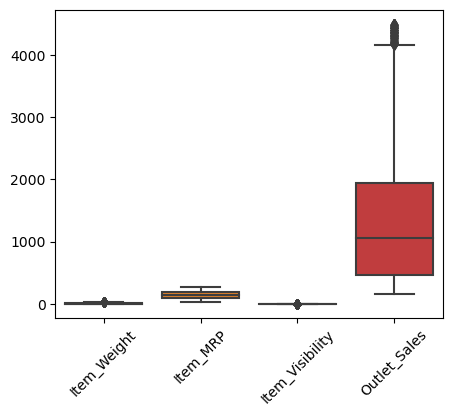

In [6]:
# Boxplot to identify the outliers in the dataset.

plt.figure(figsize=(5,4))
sns.boxplot(df[['Item_Weight','Item_MRP','Item_Visibility','Outlet_Sales']])
plt.xticks(rotation = 45)
plt.show()

### Observation -- Outliers are present in the dataset.

In [7]:
# Treating the outliers using Capping Method.

for i in df.columns.drop('Outlet_Establishment_Year'):  # Excluding the year column
    if df[i].dtype!='object':
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        IQR = q3-q1
    
        lower = q1-1.5*IQR
        upper = q3+1.5*IQR
        df[i] = np.where(df[i] > upper,upper, np.where(df[i] < lower,lower,df[i]))

### Here, Capping method is used instead of removing the outliers so that the data is not lost. In capping method, outlier values are replaced either with the upper limit or with the lower limit of the Interquartile range(IQR).

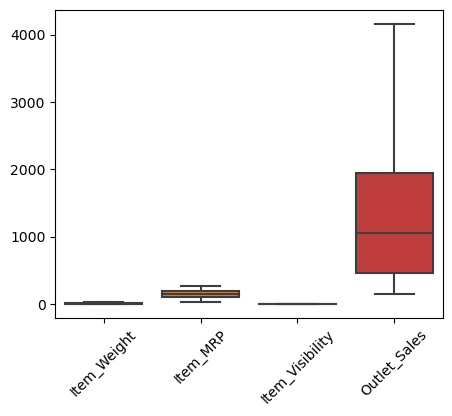

In [8]:
# Re-checking the outliers.

plt.figure(figsize=(5,4))
sns.boxplot(df[['Item_Weight','Item_MRP','Item_Visibility','Outlet_Sales']])
plt.xticks(rotation = 45)
plt.show()

In [9]:
# Identiying the null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                      800
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Outlet_Sales                    0
dtype: int64

In [10]:
# Filling the null values

for i in df.columns:
    if df[i].dtype == 'object':
        df[i].fillna(df[i].mode()[0],inplace=True)  # Filling the Null values in categorical columns with mode value.
    elif df[i].dtype != 'object':
        df[i].fillna(df[i].mean(),inplace=True)    # Filling the null values in numeric columns with mean value.
    else:
        print('Error')

In [12]:
# Identifying the unique values in 'Item_Fat_Content' columns for feature engineering.

print('Unique values in Item_Fat_column',df['Item_Fat_Content'].unique())

Unique values in Item_Fat_column ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


In [13]:
# Feature Engineering -- Renaming the categories getting repeated in Item_Fat_Content column.

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'])

# Exploratory Data Analysis

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


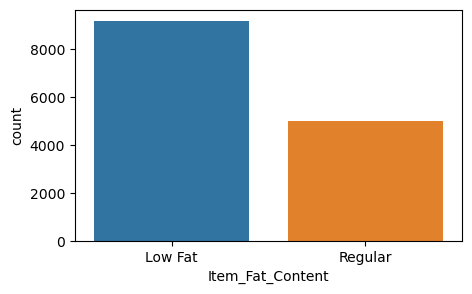

In [14]:
# Countplot of Item_Fat_Content

plt.figure(figsize=(5,3))
sns.countplot(x='Item_Fat_Content',data=df)
print(df['Item_Fat_Content'].value_counts())
plt.show()

## Observation
* Food items with Low fat content have 64.66 % contribution in total number of sales, followed by regular food items with a share of 35.33 %.

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64


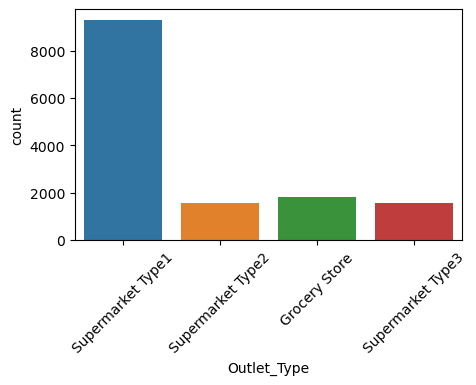

In [15]:
# Countplot of Outlet type

plt.figure(figsize=(5,3))
sns.countplot(x='Outlet_Type',data=df)
print(df['Outlet_Type'].value_counts())
plt.xticks(rotation=45)
plt.show()

## Observation
* Supermarket Type 1 has the highest contribution in number of sales, that is , 65.43 % , followed by Grocery Store (12.70 %), Supermarket Type 3 (10.97 %), Supermarket Type 2 (10.88 %).

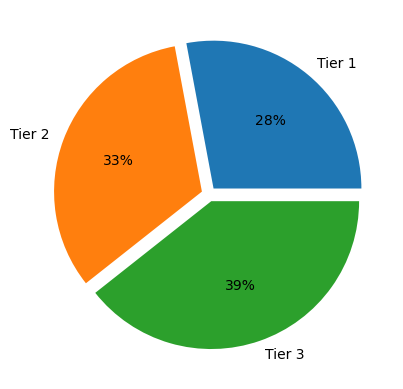

In [16]:
# Relationship between Outlet location and their contribution in total sales, using a pie chart

explode = (0.05,0.05,0.05)
df.groupby('Outlet_Location_Type').sum().plot(kind='pie',y='Outlet_Sales',autopct='%1.0f%%',explode=explode,legend=False)
plt.axis('off')
plt.show()

## Observation
* Outlets located in Tier 3 cities witnessed the highest volume of sales, that is, 39 %, followed by Tier 2 (33 %) and Tier 1 cities (28 %).

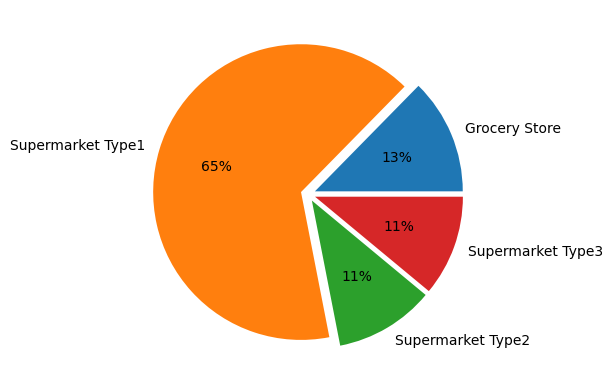

In [17]:
# Relationship between Outlet Types and their contribution in total sales.
explode = (0.05,0.05,0.05,0.05)
df.groupby('Outlet_Type').sum().plot(kind='pie',y='Outlet_Sales',autopct='%1.0f%%',explode=explode,legend=False)
plt.axis('off')
plt.show()

## Observation
* Supermarket Type 1 has the highest share in total volume of sales, that is , 65 %.
* Supermarket Type 2, Supermarket Type 3 and Grocery Store collectively contributes only 35 % of total volume of sales.

<Axes: ylabel='Item_Type'>

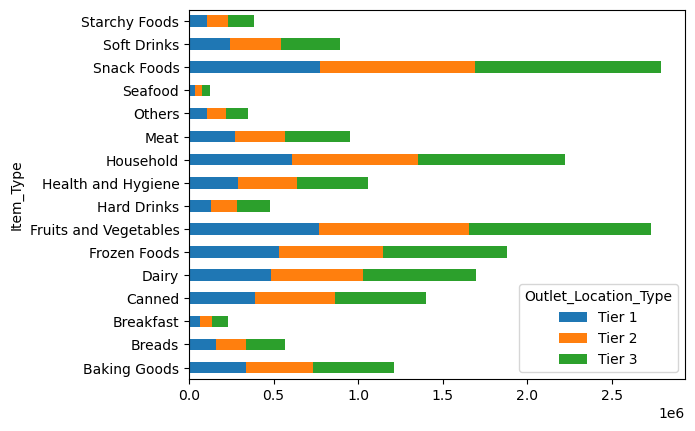

In [19]:
# Relationship between Item type, Outlet location and Outlet sales, using stacked bar chart

df.groupby(by=['Item_Type','Outlet_Location_Type'])['Outlet_Sales'].sum().unstack().plot(kind='barh',stacked=True)

## Observation
* Snack foods records the highest value of sales, followed by fruits and vegetables.
* Sea Foods records the lowest value of sales among all the food items.
* Outlets in Tier 3 cities witnessed the highest value of sales for every food item.

<Axes: xlabel='Outlet_Establishment_Year'>

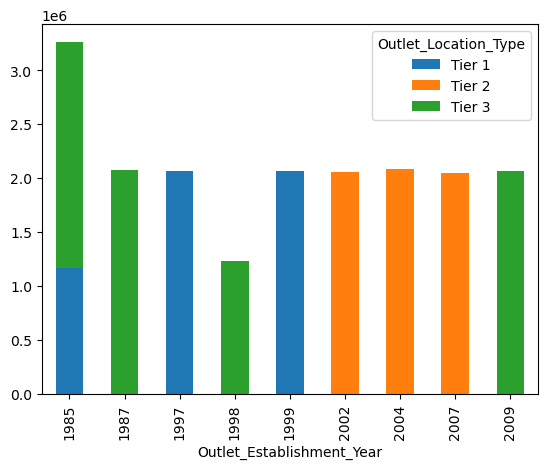

In [24]:
# Relationship between outlet establishment year, its location type and total value of sales, using stacked bar chart.

df.groupby(by=['Outlet_Establishment_Year','Outlet_Location_Type'])['Outlet_Sales'].sum().unstack().plot(kind='bar',stacked=True)

## Observation
* Outlets established in 1985 records the highest value of sales, whereas the outlets established in 1998 have the lowest sales.
* Time of establishment of an outlet does not affect the sales, as majority of outlets established over different time period from 1985 to 2009 nearly records equal value of sales.
* Most of the older outlets are located in Tier 1 and Tier 3 cities, whereas the majority of newly established outlets (2002,2004,2007) are located in Tier 2 cities.
* Newest outlets are established in 2009 and all of them belongs to Tier 3 cities/

<Axes: xlabel='Outlet_Location_Type'>

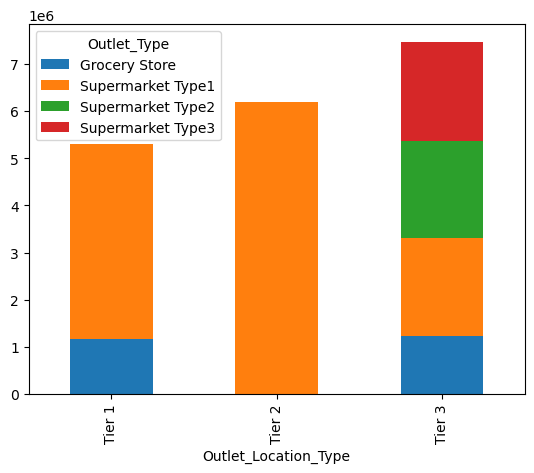

In [25]:
# Relationship between Outlet location, its type and total value of sales.
df.groupby(by=['Outlet_Location_Type','Outlet_Type'])['Outlet_Sales'].sum().unstack().plot(kind='bar',stacked=True)

## Observation
* All the outlets located in Tier 2 cities are of Supermarket Type 2.
* Tier 1 cities do not have Supermarket Type 2 and Supermarket Type 3.
* Tier 3 cities (records highest volume of sales) have all the type of outlets.
* Highest number of outlets are of Supermarket Type 1

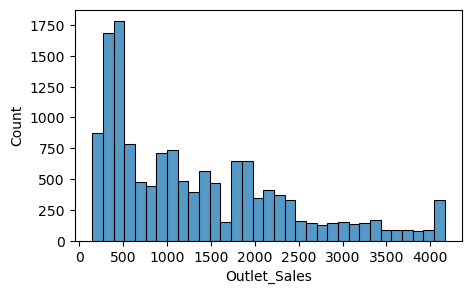

In [26]:
# Distribution of sales values using Histogram
plt.figure(figsize=(5,3))
sns.histplot(df['Outlet_Sales'])
plt.show()

## Observation
* The values in Outlet_Sales column are highly skewed towrds right.
* Majority of the sales values lie below 2000.

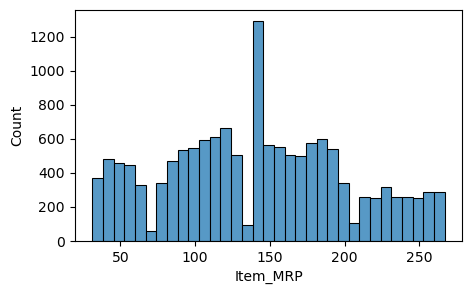

In [27]:
# Distribution of Item MRP using Histogram
plt.figure(figsize=(5,3))
sns.histplot(df['Item_MRP'])
plt.show()

## Observation
* The MRP values of Items are normally distributed (approximately).

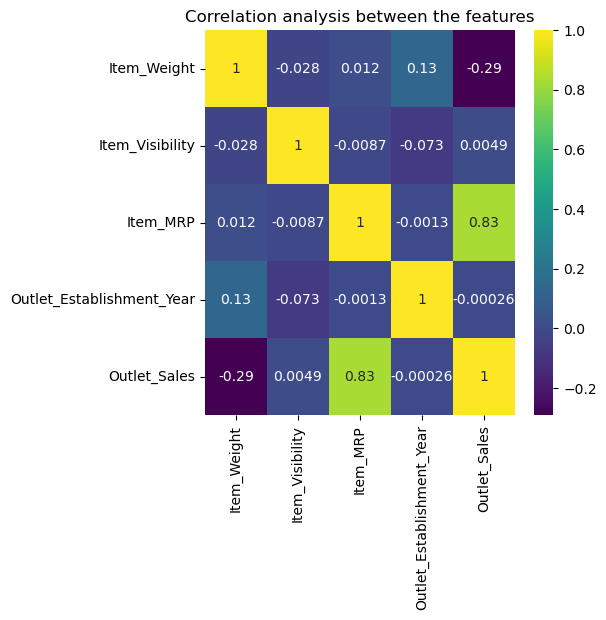

In [28]:
# correlation between numeric features using heatmap
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='viridis')
plt.title('Correlation analysis between the features')
plt.yticks(rotation=0)
plt.show()

## Observation
* There is a high positive correlation between Item MRP and Outlet Sales (0.83), which means, the outlets selling Higher valued food products records higher value of sales.
* There is a negative correlation between Item weight and outlet sales (-0.29), which means, items having lower weight records higher sales value to some extent.
* Outlet establishment year has the weakest correlation with the sales.

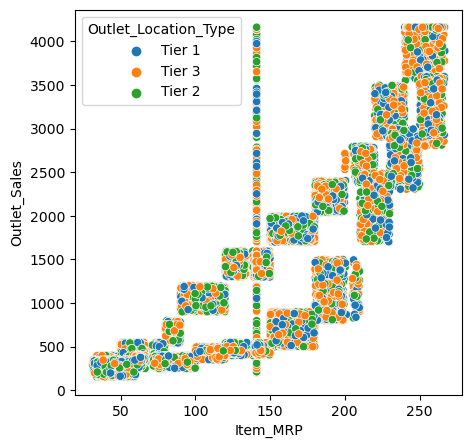

In [32]:
# Scatterplot of Item MRP and Outlet sales
plt.figure(figsize=(5,5))
sns.scatterplot(x = 'Item_MRP', y = 'Outlet_Sales', hue = 'Outlet_Location_Type', data = df)
plt.show()

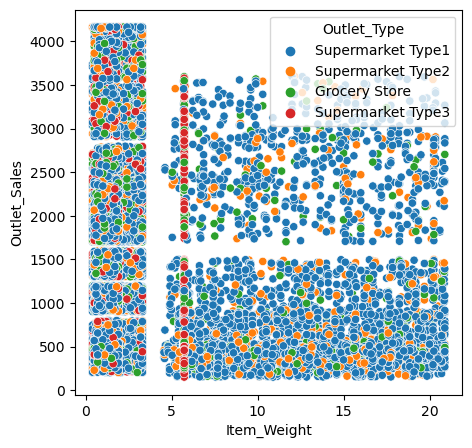

In [33]:
# Scatterplot of Item MRP and Outlet sales
plt.figure(figsize=(5,5))
sns.scatterplot(x = 'Item_Weight', y = 'Outlet_Sales', hue = 'Outlet_Type', data = df)
plt.show()

# Saving the Cleaned dataset for model building.

In [30]:
df.to_csv('After_EDA.csv')

# NOTE -- The model building part of the project is performed in 'Outlets Sales Prediction (Model Building).ipynb' file.